In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("improved_preprocessed_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Columns: 120 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(7), object(1)
memory usage: 4.5+ MB


In [4]:
df.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,relay1_log,relay2_log,relay3_log,relay4_log
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4.966000e+03,4966.000000,4.966000e+03,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,131642.877159,8.610555,131381.627418,1.681621,131711.442402,-18.174249,403.779397,10.930328,403.804157,...,7.404327e+00,59.999358,1.000000e-02,10.330778,0.014666,2048.0,1.0,1.0,1.0,1.0
std,98.099812,1413.577106,115.044643,1416.152391,96.408966,1422.205311,97.374545,117.020229,111.679895,107.440501,...,1.199162e-13,0.001680,2.637045e-16,3.345532,0.097103,0.0,0.0,0.0,0.0,0.0
min,-179.988962,127622.944500,-179.994691,127322.064900,-179.960314,127622.944400,-179.988962,3.662200,-179.736860,7.507510,...,7.404327e+00,59.996000,1.000000e-02,0.267951,-0.283431,2048.0,1.0,1.0,1.0,1.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,331.474877,-90.269501,336.006850,...,7.404327e+00,59.999000,1.000000e-02,8.257677,-0.025894,2048.0,1.0,1.0,1.0,1.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,393.869610,10.930328,395.517600,...,7.404327e+00,60.000000,1.000000e-02,9.733030,0.021392,2048.0,1.0,1.0,1.0,1.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321183,115.522615,469.127820,...,7.404327e+00,60.000000,1.000000e-02,11.885319,0.059952,2048.0,1.0,1.0,1.0,1.0
max,179.994691,135521.024200,179.971773,135220.145300,179.966044,135652.658925,179.925936,862.860098,179.988962,868.490730,...,7.404327e+00,60.003000,1.000000e-02,22.768245,0.317489,2048.0,1.0,1.0,1.0,1.0


In [5]:
x = df[["R1-PA1:VH", "R1-PM1:V", "R1-PA2:VH", "R1-PM2:V", "R1-PA3:VH", "R1-PM3:V", 
        "R1-PA4:IH", "R1-PM4:I", "R1-PA5:IH", "R1-PM5:I", "R1-PA6:IH", "R1-PM6:I", 
        "R1-PA7:VH", "R1-PM7:V", "R1-PA8:VH", "R1-PM8:V", "R1-PA9:VH", "R1-PM9:V", 
        "R1-PA10:IH", "R1-PM10:I", "R1-PA11:IH", "R1-PM11:I", "R1-PA12:IH", "R1-PM12:I", 
        "R1:F", "R1:DF", "R1-PA:Z", "R1-PA:ZH", "R1:S"]]

y = df[["marker"]]


In [6]:
x

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,611.58740,0.45324,7.69062,-10.446010,7.50751,59.999,0.01,6.391383,0.076290,2048
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,488.35437,0.45324,7.69062,-10.446010,7.50751,60.003,0.01,8.185463,0.024924,2048
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,488.35437,0.45324,7.69062,-10.446010,7.50751,60.003,0.01,8.190006,0.027904,2048
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,487.62193,0.45324,7.69062,-10.446010,7.50751,60.003,0.01,8.171532,0.025617,2048
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,488.90370,0.45324,7.69062,-10.446010,7.50751,60.001,0.01,8.079496,0.032941,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,462.16964,0.45324,7.69062,-10.446010,7.50751,59.999,0.01,8.310113,0.039983,2048
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,463.45141,0.45324,7.69062,-10.446010,7.50751,60.000,0.01,8.256475,0.044691,2048
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,466.19806,0.45324,7.69062,21.418347,7.50751,60.000,0.01,8.156751,0.062308,2048
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,466.19806,0.45324,7.69062,21.418347,7.50751,60.000,0.01,8.167257,0.062861,2048


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(y)

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,encoded_data,test_size=0.25,random_state=42)

In [9]:
x_train.shape,x_test.shape

((3724, 29), (1242, 29))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [11]:
#%% Apply SMOTE to oversample the minority class for both train and test sets
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_std, y_train)
X_resampled_test, y_resampled_test = smote.fit_resample(x_test_std, y_test)

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated 

In [12]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
# Evaluate the model
y_pred = model.predict(X_resampled_test)
print(classification_report(y_resampled_test, y_pred))
print(confusion_matrix(y_resampled_test, y_pred))
# Compute confusion matrix using the true and predicted labels
cm = confusion_matrix(y_resampled_test,y_pred)
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE",accuracy_score(y_resampled_test,y_pred))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier after SMOTE')
plt.tight_layout()
plt.show()


NameError: name 'RandomForestClassifier' is not defined

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [14:25:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for xg boost:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       941
           1       0.96      0.91      0.93       941

    accuracy                           0.93      1882
   macro avg       0.93      0.93      0.93      1882
weighted avg       0.93      0.93      0.93      1882

Confusion Matrix for xg boost:
 [[902  39]
 [ 88 853]]
ACCURACY SCORE 0.9325185972369819


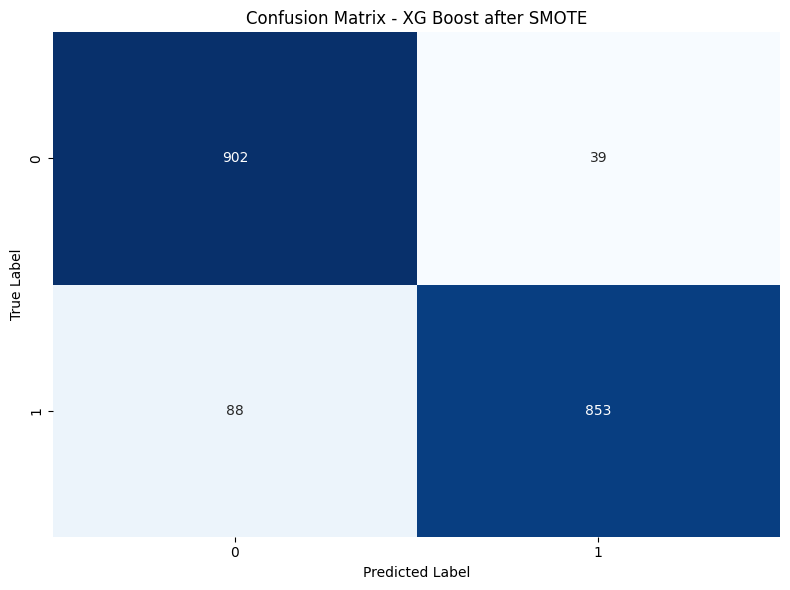

In [13]:
#xg boost(xgbc)
from xgboost import XGBClassifier
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgbc.fit(X_resampled, y_resampled)
y_pred = xgbc.predict(X_resampled_test)
print("Classification Report for xg boost:\n", classification_report(y_resampled_test, y_pred))
print("Confusion Matrix for xg boost:\n", confusion_matrix(y_resampled_test, y_pred))
# Compute confusion matrix using the true and predicted labels
cm = confusion_matrix(y_resampled_test,y_pred)
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE",accuracy_score(y_resampled_test,y_pred))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XG Boost after SMOTE')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_resampled_enc = le.fit_transform(y_resampled)  # Convert training labels
y_resampled_test_enc = le.transform(y_resampled_test)  # Convert test labels

#%% Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

#%% Train classifiers and plot confusion matrices
for clf, label in zip(all_clf, clf_labels):
    print(f"\nTraining {label}...")
    clf.fit(X_resampled, y_resampled_enc)
    
    # Predict on test data
    y_pred = clf.predict(X_resampled_test)  # ✅ Fix applied
    
    # Compute confusion matrix
    cm = confusion_matrix(y_resampled_test_enc, y_pred)
    print(f"Confusion Matrix for {label}:")
    print(cm)
    
    # Plot heatmap of confusion matrix
    plot_confusion_matrix(cm, classes=np.unique(y_resampled_test_enc), title=f'Confusion Matrix: {label}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_resampled_enc = le.fit_transform(y_resampled)  # Encode training labels
y_resampled_test_enc = le.transform(y_resampled_test)  # Encode test labels

# Define colors and line styles for plots
colors = ["black", "orange", "blue", "green", "pink", "red", "brown", "magenta"]
linestyles = [":", "--", "-.", "-", "-", "-", "-", "-"]

# Plot ROC curves for all classifiers
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.set_context('paper', font_scale=1.5)

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_resampled, y_resampled_enc)  # Train model
    y_pred_proba = clf.predict_proba(X_resampled_test)[:, 1]  # Predict probabilities
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_resampled_test_enc, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot diagonal random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()


In [ ]:
# Print the mapping of encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label Encoding Mapping:")
for original_label, encoded_value in label_mapping.items():
    print(f"'{original_label}' -> {encoded_value}")


In [15]:
import xgboost as xgb
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Train/Test Split
# Ensure you're using the correct dataset names
X_train = X_resampled  
y_train = y_resampled  
X_test = X_resampled_test  
y_test = y_resampled_test  

# Encode labels (if categorical)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()  # Change to XGBRegressor() if regression
xgb_model.fit(X_train_scaled, y_train_enc)

# Save Model, Label Encoder, and Scaler
with open("xgboost.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("✅ Model, Label Encoder, and Scaler saved successfully!")


✅ Model, Label Encoder, and Scaler saved successfully!


In [ ]:
x.to_csv("X_test.csv")